In [17]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('a-bfoodmarketingtest')
jovian.set_colab_id('1M1t4C8iGbRfYVXVA0Bcc5VskwY-tB9YX')

# a-bfoodmarketingtest

Use the "Run" button to execute the code.

In [18]:
!pip install jovian --upgrade --quiet

In [19]:
import jovian

In [20]:
# Execute this to save new versions of the notebook
jovian.commit(project="a-bfoodmarketingtest")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/programeralebrije/a-bfoodmarketingtest


'https://jovian.ai/programeralebrije/a-bfoodmarketingtest'

In [21]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/programeralebrije/a-bfoodmarketingtest


'https://jovian.ai/programeralebrije/a-bfoodmarketingtest'

In [22]:
!pip install numpy pandas jovian opendatasets scikit-learn xgboost --quiet


In [23]:
import opendatasets as od


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd
import rpy2
import numpy as np
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_1samp, shapiro, levene, f_oneway, kruskal

In [25]:
%matplotlib inline

In [26]:
from rpy2.robjects import pandas2ri

In [27]:
pandas2ri.activate()

In [28]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [29]:
dataset_url = 'https://www.kaggle.com/chebotinaa/fast-food-marketing-campaign-ab-test'

In [16]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rubenlarrazolo
Your Kaggle Key: ··········


100%|██████████| 3.31k/3.31k [00:00<00:00, 584kB/s]

In [30]:
jovian.commit()


[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/programeralebrije/a-bfoodmarketingtest


'https://jovian.ai/programeralebrije/a-bfoodmarketingtest'

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [32]:
data = pd.read_csv("/content/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv")
df = data.copy()

# Table of Content




*   Itroducction 
*   Data Cleaning 
*   Store Information 






 Introduction 


A fast food restaurant is planning to add a new item to their menu and is deciding on which promotional campaign to use to promote the new products. The series creates three campaigns and evaluates the effectiveness of each one by assigning one category to each store. We discovered that promotions 1 and 3 outperform promotions 2 and 3 across all market sizes.


In [40]:
def df_summary(df): 
    print("############### OBSERVATIONS-COLUMNS COUNTS ###############")
    print("\n")
    print(df.shape)
    print("############### INDEX ###############")
    print("\n")
    print(df.index)
    print("############### COLUMNS ###############")
    print("\n")
    print(df.columns)
    print("############### DATAFRAME INFORMATIONS ###############")
    print("\n")
    print(df.info())
    print("############### DATAFRAME INFORMATIONS ###############")
    print("\n")
    print(df.describe().T)
    print("\n")
    print(df.head())
    
df_summary(df)

############### OBSERVATIONS-COLUMNS COUNTS ###############


(548, 7)
############### INDEX ###############


RangeIndex(start=0, stop=548, step=1)
############### COLUMNS ###############


Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')
############### DATAFRAME INFORMATIONS ###############


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB
None
############### DATAFRAME

In [34]:
def missing_value_analysis(df):
    print("Is there any missing value on the dataset?")
    print(df.isnull().values.any())
    missing = df.isnull().values.any()

    if (missing == True):
        print("############### MISSING VALUE COUNTS BY VARIABLES ###############")
        print(df.isnull().sum())
        print("############### TOTAL MISSING VALUE COUNTS ###############")
        print(df.isnull().sum().sum())
    else:
        pass

missing_value_analysis(df)

Is there any missing value on the dataset?
False


In [35]:
def unique_counts(df, var):
    return df[var].nunique()
    
print("####### UNIQUE VALUE COUNTS BY VARIABLES #######", "\n")
for i in df.columns:
    if (i == "SalesInThousands"):
        continue
    else:
        print( i  + " = " + str(unique_counts(df, i)))

####### UNIQUE VALUE COUNTS BY VARIABLES ####### 

MarketID = 10
MarketSize = 3
LocationID = 137
AgeOfStore = 25
Promotion = 3
week = 4


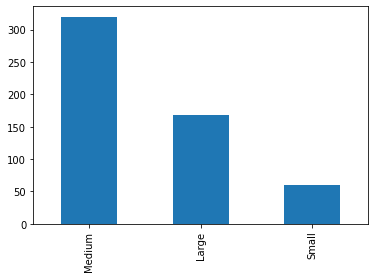

In [36]:
df["MarketSize"].value_counts().plot(kind = "bar");

In [37]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/programeralebrije/a-bfoodmarketingtest


'https://jovian.ai/programeralebrije/a-bfoodmarketingtest'

In [38]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.00,548.00,548.00,548.00,548.00,548.00
mean,5.72,479.66,8.50,2.03,2.50,53.47
std,2.88,287.97,6.64,0.81,1.12,16.76
min,1.00,1.00,1.00,1.00,1.00,17.34
25%,3.00,216.00,4.00,1.00,1.75,42.55
50%,6.00,504.00,7.00,2.00,2.50,50.20
75%,8.00,708.00,12.00,3.00,3.25,60.48
max,10.00,920.00,28.00,3.00,4.00,99.65


In [41]:
df.drop_duplicates()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


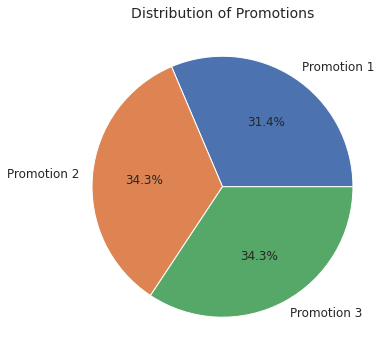

In [46]:
sns.set_theme()
plt.figure(figsize=(6,6))
pie_labels = ['Promotion 1', 'Promotion 2', 'Promotion 3']
plt.pie(df.groupby(['Promotion']).size().to_list(), 
        labels=pie_labels, autopct='%1.1f%%',textprops={'fontsize': 12})
plt.title('Distribution of Promotions', fontsize=14)
plt.show()

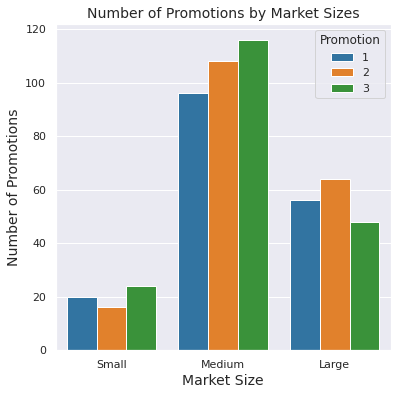

In [47]:
# Explore the promotion with different market sizes
df_bar = df.groupby(['Promotion','MarketSize']).size().to_frame().reset_index()
df_bar.rename({0:'NumOfStore'}, axis=1, inplace=True)

sns.set_theme()
plt.figure(figsize=(6,6))
ax = sns.barplot(x='MarketSize', y='NumOfStore',hue='Promotion', 
                 data=df_bar, hue_order=[1,2,3], palette='tab10', order=['Small', 'Medium','Large'])
# ax.set(xlabel='Promotion Type', ylabel='Number of Stores', fontsize=18)
plt.xlabel('Market Size', fontsize=14)
plt.ylabel('Number of Promotions', fontsize=14)
plt.legend(title='Promotion')
plt.title('Number of Promotions by Market Sizes', fontsize=14)
plt.show()

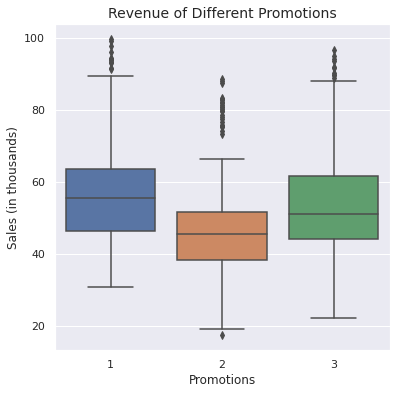

In [49]:
# Explore the sales with promotion and market sizes
fig= plt.figure(figsize=(6,6))
# ax = sns.displot(x="SalesInThousands", data=df, hue='MarketSize',
#                  col='Promotion', kind='kde', col_order=[1,2,3], hue_order=['Small','Medium','Large'])

ax = sns.boxplot(y="SalesInThousands", data=df, x='Promotion', 
                 order =[1,2,3])
ax.set_ylabel('Sales (in thousands)')
ax.set_xlabel('Promotions')
ax.set_title('Revenue of Different Promotions', fontsize=14)
plt.show()

In [51]:
df.groupby('Promotion')['SalesInThousands'].mean()

Promotion
1   58.10
2   47.33
3   55.36
Name: SalesInThousands, dtype: float64

In [52]:
p1_sale = df[df['Promotion'] == 1]['SalesInThousands']
p2_sale = df[df['Promotion'] == 2]['SalesInThousands']
p3_sale = df[df['Promotion'] == 3]['SalesInThousands']


In [53]:
stats.f_oneway(p1_sale, p2_sale, p3_sale)

F_onewayResult(statistic=21.953485793080677, pvalue=6.765849261408714e-10)

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.001,-14.774,-6.7652,True
1,3,-2.7345,0.2447,-6.7389,1.2698,False
2,3,8.0351,0.001,4.1207,11.9494,True


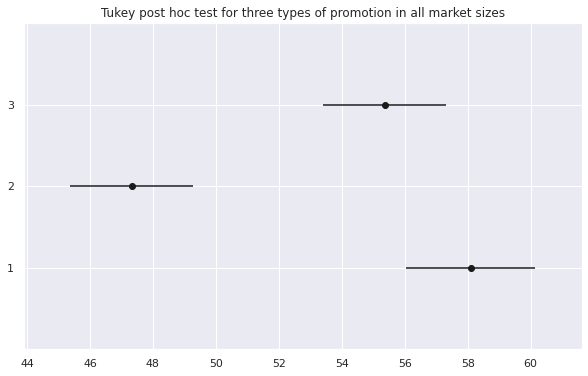

In [54]:
tukey = pairwise_tukeyhsd(endog=df['SalesInThousands'],     
                          groups=df['Promotion'],   
                          alpha=0.05)          

tukey.plot_simultaneous()    
# plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")
plt.title("Tukey post hoc test for three types of promotion in all market sizes")
tukey.summary()   

In [55]:
# Data preparation
df['market-promotion'] = df['MarketSize'].astype(str) + '-' + df['Promotion'].astype(str)
df.head(3)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,market-promotion
0,1,Medium,1,4,3,1,33.73,Medium-3
1,1,Medium,1,4,3,2,35.67,Medium-3
2,1,Medium,1,4,3,3,29.03,Medium-3


In [56]:
large1 = df.loc[(df['market-promotion']=='Large-1'), 'SalesInThousands']
large2 = df.loc[(df['market-promotion']=='Large-2'), 'SalesInThousands']
large3 = df.loc[(df['market-promotion']=='Large-3'), 'SalesInThousands']

medium1 = df.loc[(df['market-promotion']=='Medium-1'), 'SalesInThousands']
medium2 = df.loc[(df['market-promotion']=='Medium-2'), 'SalesInThousands']
medium3 = df.loc[(df['market-promotion']=='Medium-3'), 'SalesInThousands']

small1 = df.loc[(df['market-promotion']=='Small-1'), 'SalesInThousands']
small2 = df.loc[(df['market-promotion']=='Small-2'), 'SalesInThousands']
small3 = df.loc[(df['market-promotion']=='Small-3'), 'SalesInThousands']


In [57]:
stats.f_oneway(small1, small2, small3)  

F_onewayResult(statistic=16.57648112557373, pvalue=2.115939995841426e-06)

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-9.3519,0.001,-13.6829,-5.0208,True
1,3,-0.6483,0.9,-4.5579,3.2612,False
2,3,8.7035,0.001,4.536,12.8711,True


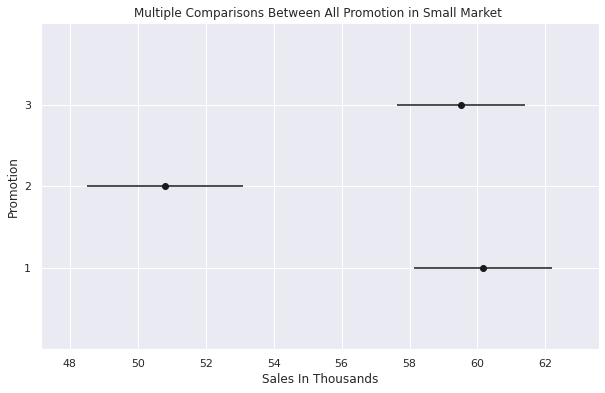

In [58]:
small = df.loc[df['MarketSize'] == 'Small', :]

tukey_small = pairwise_tukeyhsd(endog=small['SalesInThousands'],  
                          groups=small['Promotion'],   
                          alpha=0.05)  

tukey_small.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Small Market ")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")
# plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey_small.summary()

In [59]:
stats.f_oneway(medium1, medium2, medium3)  

F_onewayResult(statistic=29.68813375084531, pvalue=1.5197404971604578e-12)

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-8.5583,0.001,-11.3108,-5.8057,True
1,3,-2.2037,0.1356,-4.9113,0.5038,False
2,3,6.3545,0.001,3.7306,8.9785,True


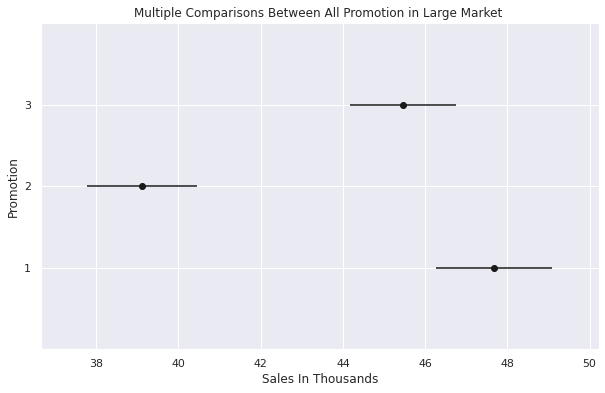

In [60]:
medium = df.loc[df['MarketSize'] == 'Medium', :]
tukey_medium = pairwise_tukeyhsd(endog=medium['SalesInThousands'],  
                          groups=medium['Promotion'],   
                          alpha=0.05)  

tukey_medium.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Large Market ")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")
# plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey_medium.summary()  

In [61]:
stats.f_oneway(large1, large2, large3)  

F_onewayResult(statistic=21.44511115677835, pvalue=5.261567483455427e-09)

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-14.9139,0.001,-21.5284,-8.2993,True
1,3,1.9681,0.7701,-5.1424,9.0785,False
2,3,16.8819,0.001,9.9797,23.7842,True


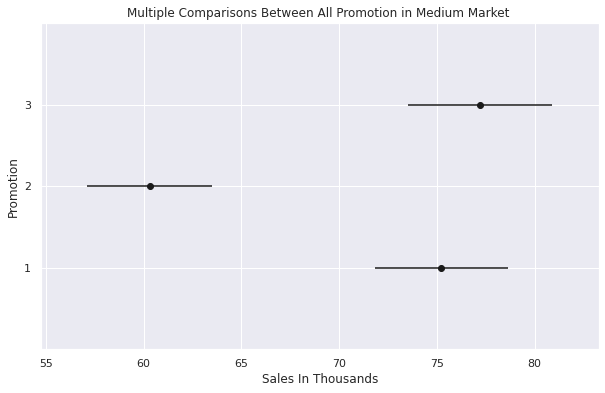

In [62]:
large = df.loc[df['MarketSize'] == 'Large', :]

tukey_large = pairwise_tukeyhsd(endog=large['SalesInThousands'],  
                          groups=large['Promotion'],   
                          alpha=0.05)  

tukey_large.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Medium Market ")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")
# plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey_large.summary() 

In [64]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/programeralebrije/a-bfoodmarketingtest


'https://jovian.ai/programeralebrije/a-bfoodmarketingtest'